In [19]:
import numpy as np
import pandas as pd
import re,math
import matplotlib.pyplot as plt
from scipy.optimize import linprog


np.set_printoptions(suppress=True)
H = pd.read_csv(r'H.csv', index_col=["Unnamed: 0"]).set_index(["0"]) # H
B = pd.read_csv(r'B.csv', index_col=["Unnamed: 0"]).set_index(["0"]) # B
price = pd.read_csv(r'price.csv', index_col=["Unnamed: 0"])
data1 = pd.read_csv(r'BCHAIN-MKPRU.csv') # B
data2 = pd.read_csv(r'LBMA-GOLD.csv') # G
fp = pd.read_csv(r'bcd.csv', index_col=["Unnamed: 0"]) # 分配比例

In [20]:
r_hex = '#dc2624'     # red,       RGB = 220,38,36
dt_hex = '#2b4750'    # dark teal, RGB = 43,71,80
tl_hex = '#45a0a2'    # teal,      RGB = 69,160,162
r1_hex = '#e87a59'    # red,       RGB = 232,122,89
tl1_hex = '#7dcaa9'   # teal,      RGB = 125,202,169
g_hex = '#649E7D'     # green,     RGB = 100,158,125
o_hex = '#dc8018'     # orange,    RGB = 220,128,24
tn_hex = '#C89F91'    # tan,       RGB = 200,159,145
g50_hex = '#6c6d6c'   # grey-50,   RGB = 108,109,108
bg_hex = '#4f6268'    # blue grey, RGB = 79,98,104
g25_hex = '#c7cccf'   # grey-25,   RGB = 199,204,207

In [21]:
fp

,Date,0,1
0,9/13/16,9.955559e-09,9.900990e-01
1,9/14/16,8.681865e-12,9.900990e-01
2,9/15/16,9.803922e-01,2.956531e-10
3,9/16/16,4.800950e-08,9.900990e-01
4,9/17/16,6.381767e-12,9.900990e-01
...,...,...,...
1819,9/6/21,8.018990e-01,1.802604e-01
1820,9/7/21,8.302089e-01,1.516702e-01
1821,9/8/21,8.647880e-01,1.167487e-01
1822,9/9/21,9.117696e-01,6.930200e-02


In [22]:
H = pd.concat([pd.DataFrame(np.array(data2["Date"][1:]),columns=["Date"]), H],axis=1)#.set_index(["Date"])
H.iloc[0:77]

,Date,1,2
0,9/13/16,NaN,NaN
1,9/14/16,NaN,NaN
2,9/15/16,NaN,NaN
3,9/16/16,NaN,NaN
4,9/19/16,NaN,NaN
...,...,...,...
72,12/22/16,NaN,NaN
73,12/23/16,NaN,NaN
74,12/28/16,NaN,NaN
75,12/29/16,NaN,NaN


In [23]:
B = pd.concat([pd.DataFrame(np.array(data1["Date"][1:]),columns=["Date"]), pd.DataFrame(B)],axis=1)#.set_index(["Date"])
B

,Date,1,2
0,9/12/16,NaN,NaN
1,9/13/16,NaN,NaN
2,9/14/16,NaN,NaN
3,9/15/16,NaN,NaN
4,9/16/16,NaN,NaN
...,...,...,...
1820,9/6/21,NaN,NaN
1821,9/7/21,NaN,NaN
1822,9/8/21,NaN,NaN
1823,9/9/21,NaN,NaN


In [24]:
price[1:]

,Date,Value,USD (PM)
1,9/12/16,609.67,1324.60
2,9/13/16,610.92,1323.65
3,9/14/16,608.82,1321.75
4,9/15/16,610.38,1310.80
5,9/16/16,609.11,1308.35
...,...,...,...
1821,9/6/21,51769.06,1821.60
1822,9/7/21,52677.40,1802.15
1823,9/8/21,46809.17,1786.00
1824,9/9/21,46078.38,1788.25


In [25]:
zdata = pd.merge(B,H,how="left", on=["Date"]).fillna(0)
zdata = pd.merge(zdata, price[1:], how="left", on="Date")
zdata = pd.merge(zdata, fp[2:], how="left", on="Date")
zdata[3:]
#   比特币交易  价格    黄金交易   价格   比特币价格  黄金价格   比特币投资比例     黄金投资比例

,Date,1_x,2_x,1_y,2_y,Value,USD (PM),0,1
3,9/15/16,0.0,0.0,0.0,0.0,610.38,1310.80,9.803922e-01,2.956531e-10
4,9/16/16,0.0,0.0,0.0,0.0,609.11,1308.35,4.800950e-08,9.900990e-01
5,9/17/16,0.0,0.0,0.0,0.0,607.04,1308.35,6.381767e-12,9.900990e-01
6,9/18/16,0.0,0.0,0.0,0.0,611.58,1308.35,9.803922e-01,7.023119e-11
7,9/19/16,0.0,0.0,0.0,0.0,610.19,1314.85,1.745573e-10,9.900990e-01
...,...,...,...,...,...,...,...,...,...
1820,9/6/21,0.0,0.0,0.0,0.0,51769.06,1821.60,8.018990e-01,1.802604e-01
1821,9/7/21,0.0,0.0,0.0,0.0,52677.40,1802.15,8.302089e-01,1.516702e-01
1822,9/8/21,0.0,0.0,0.0,0.0,46809.17,1786.00,8.647880e-01,1.167487e-01
1823,9/9/21,0.0,0.0,0.0,0.0,46078.38,1788.25,9.117696e-01,6.930200e-02


In [37]:
zdata[1050:1100]
    

,Date,1_x,2_x,1_y,2_y,Value,USD (PM),0,1
1050,7/29/19,0.0,0.00,0.0,0.0,9530.00,1419.05,5.633968e-10,9.900990e-01
1051,7/30/19,0.0,0.00,0.0,0.0,9501.33,1425.90,9.803913e-01,8.371483e-07
1052,7/31/19,0.0,0.00,0.0,0.0,9589.13,1427.55,8.449103e-10,9.900990e-01
1053,8/1/19,0.0,0.00,0.0,0.0,10084.70,1406.80,9.803922e-01,4.049832e-11
1054,8/2/19,0.0,0.00,0.0,0.0,10407.17,1441.75,9.803922e-01,4.058866e-11
1055,8/3/19,0.0,0.00,0.0,0.0,10529.55,1441.75,9.803922e-01,3.294066e-11
1056,8/4/19,0.0,0.00,0.0,0.0,10814.57,1441.75,9.803922e-01,4.166745e-12
1057,8/5/19,0.0,0.00,0.0,0.0,10980.23,1465.25,9.803922e-01,5.500473e-12
1058,8/6/19,0.0,0.00,0.0,0.0,11787.99,1465.25,9.803921e-01,2.974576e-08
1059,8/7/19,0.0,0.00,0.0,0.0,11465.67,1506.05,9.803922e-01,6.171955e-12


In [26]:
shengyu = []
huangjin = []
bitebi = []
z = 10000
hj = 0
bt = 0
for index, row in zdata[3:].iterrows():
    if row["1_x"] == 0 and row["1_y"] == 0:
        huangjin.append(hj*row["USD (PM)"])
        bitebi.append(bt*row["Value"])
        shengyu.append(z)
        continue
    z1 = z*row["0"]/(row["0"]+row["1"])
    z2 = z*row["1"]/(row["0"]+row["1"])
    if row["1_x"] != 0 and row["1_y"] == 0:   
        if row["1_x"] < 0:   # 入比特币
            bt = bt+z1/(1.02*row["Value"])
            z = z-z1
            huangjin.append(hj*row["USD (PM)"])
            bitebi.append(bt*row["Value"])
            shengyu.append(z)
            continue
        else:
            z = z + bt*0.98*row["Value"]
            bt = 0
            huangjin.append(hj*row["USD (PM)"])
            bitebi.append(bt*row["Value"])
            shengyu.append(z)
            continue
    if row["1_y"] != 0 and row["1_x"] == 0:   
        if row["1_y"] < 0:   # 入黄金
            hj = hj+z2/(1.01*row["USD (PM)"])
            z = z - z2
            huangjin.append(hj*row["USD (PM)"])
            bitebi.append(bt*row["Value"])
            shengyu.append(z)
            continue
        else:
            z = z + hj*0.99*row["USD (PM)"]
            hj = 0
            huangjin.append(hj*row["USD (PM)"])
            bitebi.append(bt*row["Value"])
            shengyu.append(z)
            continue
    if row["1_x"] != 0 and row["1_y"] != 0:
        if row["1_x"] < 0 and row["1_y"] < 0:   # 入比特币入黄金
            bt = bt+z1/(1.02*row["Value"])
            hj = hj+z2/(1.01*row["USD (PM)"])
            z = 0
            huangjin.append(hj*row["USD (PM)"])
            bitebi.append(bt*row["Value"])
            shengyu.append(z)
            continue
        elif row["1_x"] < 0 and row["1_y"] > 0: # 入比特币出黄金
            bt = bt+z1/(1.02*row["Value"])
            hj = 0
            z = z - z1 + hj*0.99*row["USD (PM)"]
            huangjin.append(hj*row["USD (PM)"])
            bitebi.append(bt*row["Value"])
            shengyu.append(z)
            continue
        elif row["1_x"] > 0 and row["1_y"] < 0: # 出比特币入黄金
            bt = 0
            hj = hj+z2/(1.01*row["USD (PM)"])
            z = z - z2 + bt*0.98*row["Value"]
            huangjin.append(hj*row["USD (PM)"])
            bitebi.append(bt*row["Value"])
            shengyu.append(z)
            continue
        elif row["1_x"] > 0 and row["1_y"] > 0: # 出比特币出黄金
            z = z + hj*0.99*row["USD (PM)"]
            z = z + bt*0.98*row["Value"]
            hj = 0
            bt = 0
            huangjin.append(hj*row["USD (PM)"])
            bitebi.append(bt*row["Value"])
            shengyu.append(z)
            continue
    print(row)

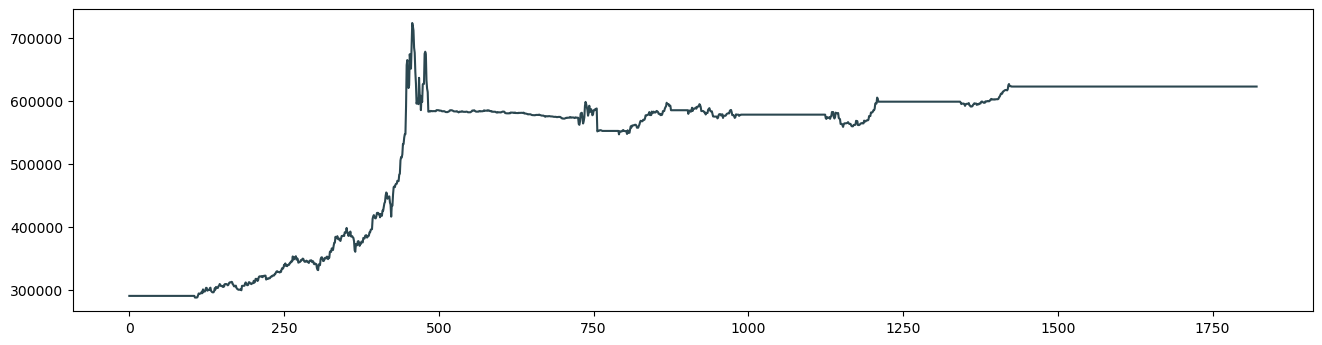

In [27]:
fig = plt.figure( figsize=(16,4), dpi=100)
ax = fig.add_subplot(1,1,1)
x = np.array([i for i in range(len(shengyu))])
y = np.array(np.array(shengyu)+np.array(huangjin)+np.array(bitebi))*29
plot = ax.plot( x, y, color=dt_hex)
# plot = ax.plot( x, np.array(shengyu), color=dt_hex)
# plot = ax.plot( x, np.array(huangjin), color=g_hex)
# plot = ax.plot( x, np.array(bitebi), color=o_hex)
# ax.set_xticks([i/10 for i in range(len(m_list))])
# plt.xlabel('Risk appetite factor',fontsize=12)
# plt.ylabel('5 years investment income',fontsize=12)
# plt.savefig('资金图.png',dpi=600)
plt.show()